# tensorflow keras入门练习——线性回归

In [97]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from scipy import stats

# 使能动态图机制
tf.enable_eager_execution()

## 线性回归

参考:
- [快速开始序贯（Sequential）模型](https://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/)
- [【TensorFlow-windows】keras接口学习——线性回归与简单的分类](https://blog.csdn.net/zb1165048017/article/details/84954275)

### 数据生成

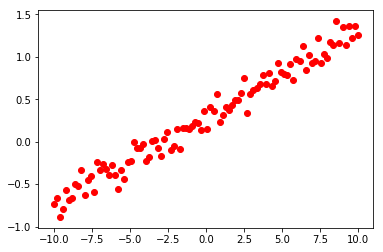

In [98]:
n = 100 # 样本个数
data_x = np.linspace(-10, 10, n) #横坐标
data_y = data_x * 0.1 + 0.3 + np.random.normal(0.0, 0.1, data_x.shape) #纵坐标，y=x*0.1+0.3+随机高斯误差
plt.scatter(data_x, data_y, c='r')
plt.show()

### 模型构建

In [99]:
model = keras.Sequential() # 顺序模型，是多个网络层的线性堆叠
model.add(keras.layers.Flatten()) #Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(keras.layers.Dense( # 全连接层，无激活函数，输入空间维度(1,)，输出空间维度(1,)
    units=1,
    use_bias=True,
    input_shape=(1,)))

In [100]:
# 随机梯度下降最大的缺点在于每次更新可能并不会按照正确的方向进行，可能带来优化扰动
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mse', # 均方差
             )

### 训练

In [101]:
history = model.fit(data_x, data_y, epochs=10, batch_size=4)

Epoch 1/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7781
Epoch 2/10
100/100 [==============================] - 0s 220us/sample - loss: 0.0399
Epoch 3/10
100/100 [==============================] - 0s 218us/sample - loss: 0.0242
Epoch 4/10
100/100 [==============================] - 0s 216us/sample - loss: 0.0163
Epoch 5/10
100/100 [==============================] - 0s 217us/sample - loss: 0.0156
Epoch 6/10
100/100 [==============================] - 0s 216us/sample - loss: 0.0156
Epoch 7/10
100/100 [==============================] - 0s 219us/sample - loss: 0.0125
Epoch 8/10
100/100 [==============================] - 0s 215us/sample - loss: 0.0125
Epoch 9/10
100/100 [==============================] - 0s 215us/sample - loss: 0.0133
Epoch 10/10
100/100 [==============================] - 0s 222us/sample - loss: 0.0138


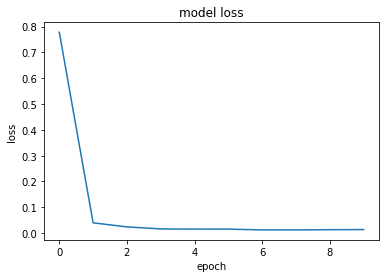

In [102]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### 结果评估

In [103]:
# 模型参数
print(model.layers[1].get_weights())

[array([[0.10209809]], dtype=float32), array([0.28909355], dtype=float32)]


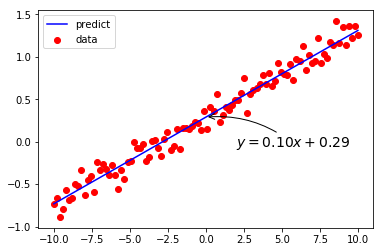

In [104]:
predict_x = np.linspace(-10, 10, 100)
predict_y = model.predict(predict_x) # 预测

plt.scatter(data_x, data_y, c='r')
plt.plot(predict_x, predict_y, c='b')
plt.legend(["predict", "data"], loc="upper left")

w = model.layers[1].get_weights()[0][0][0]
b = model.layers[1].get_weights()[1][0]
plt.annotate(r'$y=%.2fx+%.2f$' % (w, b), # 标注内容
             xy=(0, model.predict([0])), # 标注点位置
             xytext=(+30, -30), # 标注内容偏移
             textcoords='offset points', # 以xy为原点偏移xytext
             fontsize=14,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2') #画弧线箭头
            )
plt.show()

## 波士顿房价预测

参考：
- [线性回归](http://paddlepaddle.org/documentation/docs/zh/1.4/beginners_guide/basics/fit_a_line/README.cn.html)

### 数据加载和探查

In [105]:
from tensorflow.keras.datasets import boston_housing

In [106]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [107]:
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)
print('test data:', test_data.shape)
print('test labels:', test_labels.shape)

train data: (404, 13)
train labels: (404,)
test data: (102, 13)
test labels: (102,)


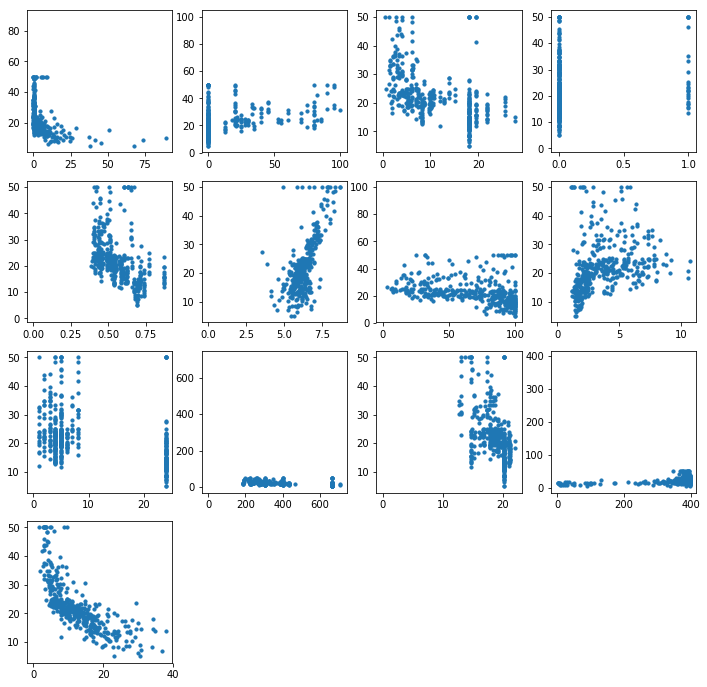

In [108]:
rows = 4
lines = math.ceil(train_data.shape[1] / rows)

fig = plt.figure(figsize=(12, 12))
for i in range(train_data.shape[1]):
    ax = fig.add_subplot(lines, rows, i+1)
    ax.scatter(train_data[:,i], train_labels, s=10)
    ax.plot(max(train_data[:,i]), )
fig.show()

In [109]:
def data_stat_info(data):
    return DataFrame({'max':  data.max(0),
                      'min':  data.min(0),
                      'mean': data.mean(0),
                      'mode': stats.mode(data)[0][0],
                      'mode_count': stats.mode(data)[1][0],
                      'median': np.median(data, axis=0)
                     })
    
print('train data:')
print(data_stat_info(train_data))

print('\ntest data:')
print(data_stat_info(test_data))

train data:
         max        min        mean       mode  mode_count     median
0    88.9762    0.00632    3.745111    0.00632           1    0.26888
1   100.0000    0.00000   11.480198    0.00000         300    0.00000
2    27.7400    0.46000   11.104431   18.10000         104    9.69000
3     1.0000    0.00000    0.061881    0.00000         379    0.00000
4     0.8710    0.38500    0.557356    0.53800          21    0.53800
5     8.7250    3.56100    6.267082    4.13800           2    6.19850
6   100.0000    2.90000   69.010644  100.00000          34   78.50000
7    10.7103    1.12960    3.740271    3.49520           4    3.14230
8    24.0000    1.00000    9.440594   24.00000         104    5.00000
9   711.0000  188.00000  405.898515  666.00000         104  330.00000
10   22.0000   12.60000   18.475990   20.20000         111   19.10000
11  396.9000    0.32000  354.783168  396.90000          95  391.25000
12   37.9700    1.73000   12.740817    6.36000           3   11.39500

test da

In [110]:
print('train data:')
print(DataFrame(train_data).head(10))

print('\ntest data:')
print(DataFrame(test_data).head(10))

train data:
        0     1      2    3      4      5      6       7     8      9     10  \
0  1.23247   0.0   8.14  0.0  0.538  6.142   91.7  3.9769   4.0  307.0  21.0   
1  0.02177  82.5   2.03  0.0  0.415  7.610   15.7  6.2700   2.0  348.0  14.7   
2  4.89822   0.0  18.10  0.0  0.631  4.970  100.0  1.3325  24.0  666.0  20.2   
3  0.03961   0.0   5.19  0.0  0.515  6.037   34.5  5.9853   5.0  224.0  20.2   
4  3.69311   0.0  18.10  0.0  0.713  6.376   88.4  2.5671  24.0  666.0  20.2   
5  0.28392   0.0   7.38  0.0  0.493  5.708   74.3  4.7211   5.0  287.0  19.6   
6  9.18702   0.0  18.10  0.0  0.700  5.536  100.0  1.5804  24.0  666.0  20.2   
7  4.09740   0.0  19.58  0.0  0.871  5.468  100.0  1.4118   5.0  403.0  14.7   
8  2.15505   0.0  19.58  0.0  0.871  5.628  100.0  1.5166   5.0  403.0  14.7   
9  1.62864   0.0  21.89  0.0  0.624  5.019  100.0  1.4394   4.0  437.0  21.2   

       11     12  
0  396.90  18.72  
1  395.38   3.11  
2  375.52   3.26  
3  396.90   8.01  
4  391.43  1

### 数据预处理

In [111]:
# 最大最小归一化
data_min, data_max = train_data.min(axis=0), train_data.max(axis=0)
train_data = (train_data - data_min) / (data_max - data_min)
label_min, label_max = train_labels.min(axis=0), train_labels.max(axis=0)
train_labels = (train_labels - label_min) / (label_max - label_min)

test_data = (test_data - data_min) / (data_max - data_min)
test_labels = (test_labels - label_min) / (label_max - label_min)

### 模型构建

In [112]:
model = keras.Sequential() # 顺序模型，是多个网络层的线性堆叠
model.add(keras.layers.Flatten()) #Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(keras.layers.Dense( # 全连接层，无激活函数，输入空间维度(1,)，输出空间维度(1,)
    units=1,
    use_bias=True,
    input_shape=(train_data.shape[1],)))

In [113]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='mse', # 均方差
             )

### 训练

In [114]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=8)

Epoch 1/100
404/404 [==============================] - 0s 829us/sample - loss: 0.1330
Epoch 2/100
404/404 [==============================] - 0s 115us/sample - loss: 0.0669
Epoch 3/100
404/404 [==============================] - 0s 114us/sample - loss: 0.0574
Epoch 4/100
404/404 [==============================] - 0s 114us/sample - loss: 0.0544
Epoch 5/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0518
Epoch 6/100
404/404 [==============================] - 0s 114us/sample - loss: 0.0497
Epoch 7/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0470
Epoch 8/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0450
Epoch 9/100
404/404 [==============================] - 0s 115us/sample - loss: 0.0427
Epoch 10/100
404/404 [==============================] - 0s 113us/sample - loss: 0.0410
Epoch 11/100
404/404 [==============================] - 0s 114us/sample - loss: 0.0392
Epoch 12/100
404/404 [==============================

404/404 [==============================] - 0s 116us/sample - loss: 0.0121
Epoch 96/100
404/404 [==============================] - 0s 117us/sample - loss: 0.0120
Epoch 97/100
404/404 [==============================] - 0s 116us/sample - loss: 0.0120
Epoch 98/100
404/404 [==============================] - 0s 115us/sample - loss: 0.0120
Epoch 99/100
404/404 [==============================] - 0s 117us/sample - loss: 0.0119
Epoch 100/100
404/404 [==============================] - 0s 117us/sample - loss: 0.0118


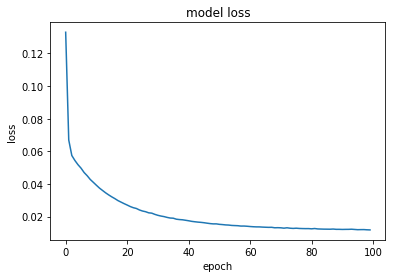

In [115]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### 结果评估

In [116]:
# 模型参数
print(model.layers[1].get_weights())

[array([[-0.16475718],
       [ 0.09616281],
       [-0.05129208],
       [ 0.10534409],
       [-0.18652453],
       [ 0.4602257 ],
       [ 0.05107694],
       [-0.27610576],
       [ 0.01095891],
       [ 0.08012513],
       [-0.16639276],
       [ 0.13280477],
       [-0.43878794]], dtype=float32), array([0.32961202], dtype=float32)]


In [117]:
score = model.evaluate(test_data, test_labels)
print('loss:%.4f' % score)

102/102 [==============================] - 0s 1ms/sample - loss: 0.0121
loss:0.0121
